# Chapter 3: Estimation
---

In [1]:
%load_ext autoreload
%autoreload 2

### The dice problem

Suppose I have a box of dice that contains: 
- a 4-sided die
- a 6-sided die
- an 8-sided die
- a 12-sided die
- a 20-sided die

Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?

To answer that, we will follow this general strategy:
1. Choose a representation for the hypotheses.
2. Choose a representation for the data.
3. Write the likelihood function.

In [8]:
# I will use the number i to represent the hypothesis that the die I took has i sides.
# Thus I have a suite of 5 hypotheses, and I represent them like this:
hypotheses = [4, 6, 8, 12, 20]

# The possible outcomes (data I get when I roll the dice) are represented by integres from 1 to 20

# I import the abstract type that I defined in notebook 2:
from think_bayes_modified import Suite

In [23]:
class Dice(Suite):
    """Represents hypotheses about which die was rolled."""
    def Likelihood(self, data, hypo):
        """ 
        Computes the likelihood of the data under the hypothesis.
        hypo: integer number of sides on the die
        data: integer got when rolling the die 
        """
        if hypo < data:  # if the number of faces of dice < obtained number
            return 0.0  # it is impossible
        else:
            return 1.0 / hypo  # uniform distribution of probab (fair dice)

In [24]:
suite = Dice(hypotheses)
suite.Print()

Distribution of probabilites now: 
---------------------------------------------

Hypothesis 4: 0.2000
Hypothesis 6: 0.2000
Hypothesis 8: 0.2000
Hypothesis 12: 0.2000
Hypothesis 20: 0.2000


In [25]:
# I roll the unknown die and get a 6. What do I think now?
roll = 6

suite.Update(roll)
suite.Print()

Distribution of probabilites now: 
---------------------------------------------

Hypothesis 4: 0.0000
Hypothesis 6: 0.3922
Hypothesis 8: 0.2941
Hypothesis 12: 0.1961
Hypothesis 20: 0.1176


What if we roll a few more times and get 6, 8, 7, 7, 5, and 4?

In [26]:
observations = [6, 8, 7, 7, 5, 4]  # several rolls of the same, yet unkonwn die

for obs in observations:
    suite.Update(obs)
    
suite.Print()

Distribution of probabilites now: 
---------------------------------------------

Hypothesis 4: 0.0000
Hypothesis 6: 0.0000
Hypothesis 8: 0.9432
Hypothesis 12: 0.0552
Hypothesis 20: 0.0015


Now the probability (our degree of certainty) that we are rolling the 8-sided die is 94%, and less than 1% for the 20-sided die.

### The Locomotive Problem

“A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.”

Based on this observation, we know the railroad has 60 or more locomotives. But how many more? To apply Bayesian reasoning, we can break this problem into two steps:

1. What did we know about N before we saw the data? (**Prior distribution**)
2. For any given value of N, what is the likelihood of seeing the data (a locomotive with number 60)? (**Likelihood distribution**)

We don’t have much basis to choose a prior, but we can **start with something simple and then consider alternatives**. After all, due to our knowledge of the world we can estimate a reasonable upper limit for the number of trains that any realistic company could have. We assume this upper limit to be 1000 (but could have perfectly been 900 or 1200, this does not matter).

Thus, let’s assume that N is equally likely to be any value from 1 to 1000. 

In [27]:
hypos = range(1, 1001)  # prior: We assume that there exist a maximum of N = 1000 trains

In a hypothetical fleet of N locomotives, what is the probability that we would see number 60? If we **assume** that there is only one train-operating company and that we are equally likely to see any of its locomotives, then the chance of seeing any particular locomotive is 1/N.

In [31]:
import matplotlib.pyplot as plt

In [84]:
class Train(Suite):
    """ Suite for dealing with distribution for the Locomotive Problem """
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0.0  # impossible to see a train with number i if there are fewer than i trains
        else:
            return 1.0 / hypo  # Likelihood to find train i in a population of k trains (k > i)
        
    def PlotProb(self):
        fig, ax = plt.subplots()
        ax.plot(suite.GetDict().keys(), suite.GetDict().values())
        ax.autoscale(tight=True)
        ax.locator_params(nbins=3)    
        ax.set_xlabel('hypotheses', fontsize=12)    
        ax.set_ylabel('probability', fontsize=12)    
        ax.set_title('Current probability distribution', fontsize=12)
        return ax

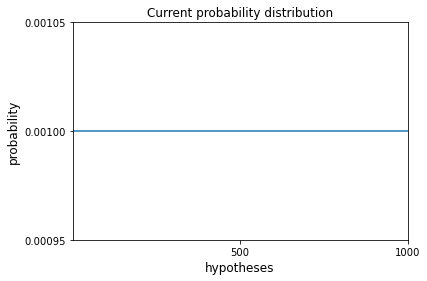

In [89]:
suite = Train(hypos)
suite.PlotProb();

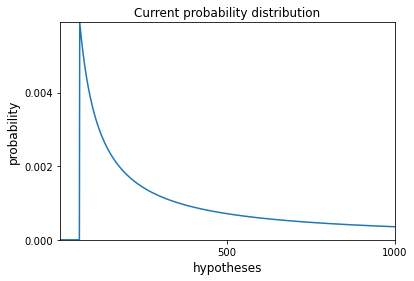

In [90]:
obs = 60  # we observe a train with the number 60
suite.Update(obs)
suite.PlotProb();